In [1]:
from conx import Network, Layer, SGD

#net = Network("XOR Network", 2, 4, 1, activation="sigmoid")

net = Network("XOR Network")
net.add(Layer("input", shape=2))
net.add(Layer("hidden", shape=4, activation='sigmoid'))
net.add(Layer("output", shape=1, activation='sigmoid'))
net.connect()

dataset = [
    ([0, 0], [0]),
    ([0, 1], [1]),
    ([1, 0], [1]),
    ([1, 1], [0])
]
net.compile(error='mean_squared_error', optimizer=SGD(lr=0.3, momentum=0.9))
net.dataset.load(dataset)

conx, version 3.3.4
Using Theano backend.


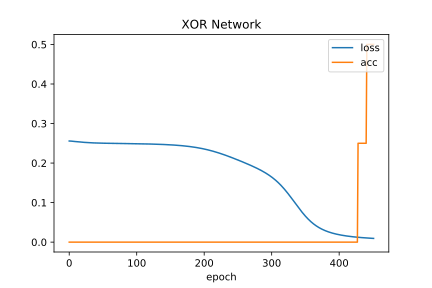

#  457 |   0.00886 |   1.00000 


In [2]:
net.reset(seed=3863479522)
net.train(epochs=2000, accuracy=1, report_rate=25, plot=True)

In [22]:
import numpy as np

def sigmoid(x):
    return 1/(np.exp(-x)+1)

def output_val(vector, layer, net):
    w = net[layer].keras_layer.get_weights()[0]
    bias = net[layer].keras_layer.get_weights()[1]
    outputs = []
    for j in range(len(bias)):
        sum = 0.0
        for i in range(len(vector)):
            sum += (vector[i] * w[i][j])
        outputs.append(sigmoid(sum + bias[j]))
    return outputs

def propagate(vector, net):
    for layer in ["hidden", "output"]:
        vector = output_val(vector, layer, net)
    return vector

In [23]:
for i in range(4):
    print(propagate(dataset[i][0], net), dataset[i][1])

[0.084041546506362405] [0]
[0.90053873332788392] [1]
[0.90790966242605331] [1]
[0.098315021116301402] [0]


In [24]:
for i in range(4):
    print(net.propagate(dataset[i][0]), dataset[i][1])

[0.08404156565666199] [0]
[0.9005388021469116] [1]
[0.9079096913337708] [1]
[0.09831498563289642] [0]


In [25]:
from conx import Network, Layer, SGD

#net = Network("XOR Network", 2, 4, 1, activation="sigmoid")

net = Network("XOR Network")
net.add(Layer("input", shape=2))
net.add(Layer("hidden1", shape=4, activation='sigmoid'))
net.add(Layer("hidden2", shape=2, activation='sigmoid'))
net.add(Layer("output", shape=1, activation='sigmoid'))
net.connect()

dataset = [
    ([0, 0], [0]),
    ([0, 1], [1]),
    ([1, 0], [1]),
    ([1, 1], [0])
]
net.compile(error='mean_squared_error', optimizer=SGD(lr=0.3, momentum=0.9))
net.dataset.load(dataset)

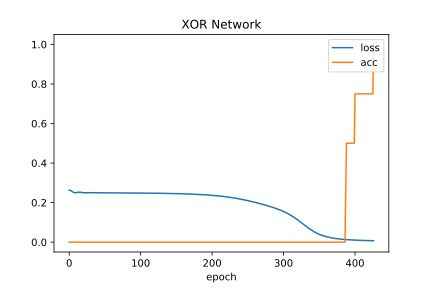

#  426 |   0.00691 |   1.00000 


In [26]:
net.reset(seed=3863479522)
net.train(epochs=2000, accuracy=1, report_rate=25, plot=True)

In [27]:
def propagate(vector, net):
    for layer in ["hidden1", "hidden2", "output"]:
        vector = output_val(vector, layer, net)
    return vector

In [28]:
propagate([0, 1], net)

[0.91859863250800711]

In [29]:
net.propagate([0,1])

[0.9185985326766968]

In [30]:
output_val([0, 1], "hidden1", net)

[0.68033963220504923,
 0.78663423447286152,
 0.028392841737056793,
 0.99709843121219399]